In [ ]:
import pandas as pd

In [ ]:
dt = pd.read_csv('/content/seattle-weather.csv')

In [ ]:
dt.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
dt.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [ ]:
dt.dtypes

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

In [ ]:
dt['weather'].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
dt['weather'] = lb.fit_transform(dt['weather'] )

In [ ]:

dt['date'] = pd.to_datetime(dt['date'])

reference_date = pd.to_datetime('2012-01-01')

dt['date'] = (dt['date'] - reference_date).dt.days



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
feature_columns = ['date','precipitation','temp_max','temp_min','wind']
dt[feature_columns] = scaler.fit_transform(dt[feature_columns])



In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

# Assuming dt is your DataFrame containing the dataset
x_columns = ['date', 'precipitation', 'temp_max', 'temp_min', 'wind']
y_column = 'weather'

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(dt[x_columns].values, dt[y_column].values, test_size=0.2, random_state=42)

# Reshape input features for SimpleRNN
x_train_reshaped = x_train.reshape(-1, len(x_columns), 1)
x_val_reshaped = x_val.reshape(-1, len(x_columns), 1)

# Define the RNN model
model = Sequential()
model.add(SimpleRNN(32, input_shape=(len(x_columns), 1)))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model with validation data
history = model.fit(x_train_reshaped, y_train, epochs=20, batch_size=32, validation_data=(x_val_reshaped, y_val))


Epoch 1/20
37/37 [==============================] - 4s 38ms/step - loss: 0.8513 - val_loss: 0.7407
Epoch 2/20
37/37 [==============================] - 0s 10ms/step - loss: 0.8184 - val_loss: 0.7428
Epoch 3/20
37/37 [==============================] - 0s 10ms/step - loss: 0.7980 - val_loss: 0.7291
Epoch 4/20
37/37 [==============================] - 0s 8ms/step - loss: 0.7880 - val_loss: 0.7368
Epoch 5/20
37/37 [==============================] - 0s 8ms/step - loss: 0.7822 - val_loss: 0.7262
Epoch 6/20
37/37 [==============================] - 0s 8ms/step - loss: 0.7673 - val_loss: 0.7161
Epoch 7/20
37/37 [==============================] - 0s 7ms/step - loss: 0.7595 - val_loss: 0.7304
Epoch 8/20
37/37 [==============================] - 1s 15ms/step - loss: 0.7546 - val_loss: 0.7086
Epoch 9/20
37/37 [==============================] - 0s 12ms/step - loss: 0.7429 - val_loss: 0.7079
Epoch 10/20
37/37 [==============================] - 0s 10ms/step - loss: 0.7375 - val_loss: 0.7014
Epoch 11/20
3

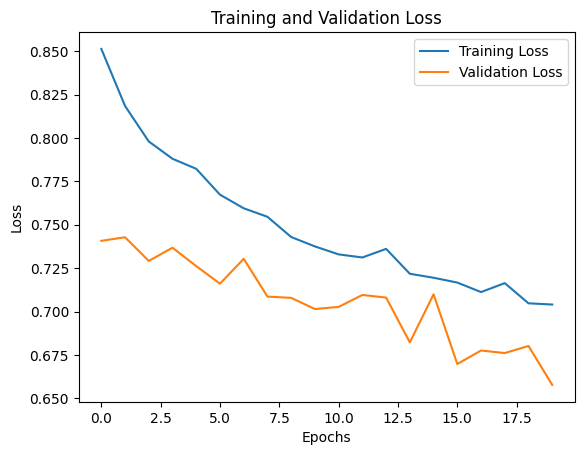

In [ ]:
import matplotlib.pyplot as plt
hist_df=pd.DataFrame(history.history)


plt.plot(hist_df['loss'], label='Training Loss')
plt.plot(hist_df['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()



In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_val)
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_val, y_pred)
print(f"The mean absolute error :  {mae}")


10/10 [==============================] - 0s 5ms/step
The mean absolute error :  0.781531855700252


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM,Dense



model = Sequential()
model.add(LSTM(32, input_shape=(5, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

history2 = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))


Epoch 1/20
37/37 [==============================] - 4s 27ms/step - loss: 0.9975 - val_loss: 0.9802
Epoch 2/20
37/37 [==============================] - 0s 9ms/step - loss: 0.9923 - val_loss: 0.9755
Epoch 3/20
37/37 [==============================] - 0s 8ms/step - loss: 0.9881 - val_loss: 0.9674
Epoch 4/20
37/37 [==============================] - 0s 9ms/step - loss: 0.9836 - val_loss: 0.9619
Epoch 5/20
37/37 [==============================] - 0s 9ms/step - loss: 0.9764 - val_loss: 0.9483
Epoch 6/20
37/37 [==============================] - 0s 7ms/step - loss: 0.9639 - val_loss: 0.9178
Epoch 7/20
37/37 [==============================] - 0s 6ms/step - loss: 0.9394 - val_loss: 0.8848
Epoch 8/20
37/37 [==============================] - 0s 5ms/step - loss: 0.9218 - val_loss: 0.8614
Epoch 9/20
37/37 [==============================] - 0s 6ms/step - loss: 0.9149 - val_loss: 0.8690
Epoch 10/20
37/37 [==============================] - 0s 5ms/step - loss: 0.9126 - val_loss: 0.8619
Epoch 11/20
37/37 

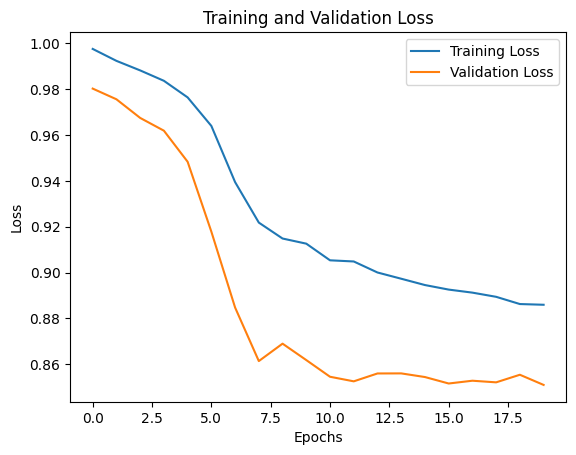

In [ ]:
import matplotlib.pyplot as plt

hist_df=pd.DataFrame(history2.history)

plt.plot(hist_df['loss'], label='Training Loss')
plt.plot(hist_df['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()



In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_val)
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_val, y_pred)
print(f"The mean absolute error :  {mae}")

10/10 [==============================] - 0s 3ms/step
The mean absolute error :  0.7870546100689126


MACHINE TRANSLATE - Rule based

In [ ]:

english_to_german = {
    "hello": "hallo",
    "world": "Welt",
    "good": "gut",
    "morning": "Morgen",
    "afternoon": "Nachmittag",
    "evening": "Abend",

}


def translate_to_german(sentence):
    translated_sentence = []
    words = sentence.lower().split()
    for word in words:
        if word in english_to_german:
            translated_sentence.append(english_to_german[word])
        else:

            translated_sentence.append(word)
    return " ".join(translated_sentence)


english_sentence = input("Enter the English sentence: ")

german_translation = translate_to_german(english_sentence)


print("English:", english_sentence)
print("German:", german_translation)


Enter the English sentence: hello morning
English: hello morning
German: hallo Morgen
